In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
#remove scientific notation for clairty
pd.set_option('display.float_format', lambda x: '%.5f' % x)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})

#revert global pd option
#pd.reset_option('display.float_format')

In [3]:
dataset = pd.read_csv('full_dataset_imputed_cluster_20.csv')
dataset.head()

,TypeH,TypeT,TypeU,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longitude,Propertycount,PriceRange,cluster_label
0,1.00000,0.00000,0.00000,2.00000,1480000.00000,2.50000,1.00000,1.00000,202.00000,156.83459,1966.60915,-37.79960,144.99840,4019.00000,1M - 3M,9
1,1.00000,0.00000,0.00000,2.00000,1035000.00000,2.50000,1.00000,0.00000,156.00000,79.00000,1900.00000,-37.80790,144.99340,4019.00000,1M - 3M,9
2,1.00000,0.00000,0.00000,3.00000,1465000.00000,2.50000,2.00000,0.00000,134.00000,150.00000,1900.00000,-37.80930,144.99440,4019.00000,1M - 3M,9
3,1.00000,0.00000,0.00000,3.00000,850000.00000,2.50000,2.00000,1.00000,94.00000,156.83459,1966.60915,-37.79690,144.99690,4019.00000,"100,001 - 1M",9
4,1.00000,0.00000,0.00000,4.00000,1600000.00000,2.50000,1.00000,2.00000,120.00000,142.00000,2014.00000,-37.80720,144.99410,4019.00000,1M - 3M,9


In [4]:
X = dataset.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13,15]]
y = dataset.iloc[:,4].values
X

,TypeH,TypeT,TypeU,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longitude,Propertycount,cluster_label
0,1.00000,0.00000,0.00000,2.00000,2.50000,1.00000,1.00000,202.00000,156.83459,1966.60915,-37.79960,144.99840,4019.00000,9
1,1.00000,0.00000,0.00000,2.00000,2.50000,1.00000,0.00000,156.00000,79.00000,1900.00000,-37.80790,144.99340,4019.00000,9
2,1.00000,0.00000,0.00000,3.00000,2.50000,2.00000,0.00000,134.00000,150.00000,1900.00000,-37.80930,144.99440,4019.00000,9
3,1.00000,0.00000,0.00000,3.00000,2.50000,2.00000,1.00000,94.00000,156.83459,1966.60915,-37.79690,144.99690,4019.00000,9
4,1.00000,0.00000,0.00000,4.00000,2.50000,1.00000,2.00000,120.00000,142.00000,2014.00000,-37.80720,144.99410,4019.00000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,0.00000,0.00000,1.00000,2.00000,6.80000,1.59168,1.71537,593.48893,156.83459,1966.60915,-37.85991,144.89468,6380.00000,14
27206,0.00000,0.00000,1.00000,2.00000,6.80000,1.59168,1.71537,593.48893,156.83459,1966.60915,-37.85689,144.89079,6380.00000,14
27207,0.00000,0.00000,1.00000,2.00000,6.80000,1.59168,1.71537,593.48893,156.83459,1966.60915,-37.86394,144.90485,6380.00000,14
27208,0.00000,0.00000,1.00000,1.00000,4.60000,1.59168,1.71537,593.48893,156.83459,1966.60915,-37.85682,144.99913,4380.00000,4


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
regressor = xgb.XGBRegressor(max_depth=5,n_estimators=150)

In [8]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_test, y_test)])
# regressor.fit(X_train,y_train)

[09:14:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.11397e+06	validation_1-rmse:1.12554e+06
[1]	validation_0-rmse:1.01782e+06	validation_1-rmse:1.02932e+06
[2]	validation_0-rmse:931299	validation_1-rmse:942682
[3]	validation_0-rmse:854389	validation_1-rmse:865330
[4]	validation_0-rmse:786392	validation_1-rmse:797470
[5]	validation_0-rmse:725929	validation_1-rmse:737102
[6]	validation_0-rmse:673176	validation_1-rmse:683738
[7]	validation_0-rmse:625956	validation_1-rmse:636281
[8]	validation_0-rmse:584398	validation_1-rmse:594065
[9]	validation_0-rmse:547882	validation_1-rmse:557471
[10]	validation_0-rmse:516002	validation_1-rmse:524995
[11]	validation_0-rmse:487648	validation_1-rmse:497041
[12]	validation_0-rmse:463134	validation_1-rmse:472785
[13]	validation_0-rmse:441920	validation_1-rmse:451019
[14]	validation_0-rmse:423162	validation_1-rmse:432611
[

[145]	validation_0-rmse:243396	validation_1-rmse:280402
[146]	validation_0-rmse:243091	validation_1-rmse:280262
[147]	validation_0-rmse:242864	validation_1-rmse:280124
[148]	validation_0-rmse:242636	validation_1-rmse:280013
[149]	validation_0-rmse:242282	validation_1-rmse:279890


XGBRegressor(max_depth=5, n_estimators=150)

In [9]:
y_pred = regressor.predict(X_test)

In [10]:
y_pred

array([1317590.000000, 1512976.750000, 697127.312500, ..., 1068216.250000,
       1450260.500000, 2928456.250000], dtype=float32)

In [11]:
y_test

array([1450000.000000, 1571000.000000, 721000.000000, ..., 1035000.000000,
       1336000.000000, 2800000.000000])

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error
r2_score(y_pred, y_test)

0.75483897952454

In [13]:
eval_result = regressor.evals_result()

In [14]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

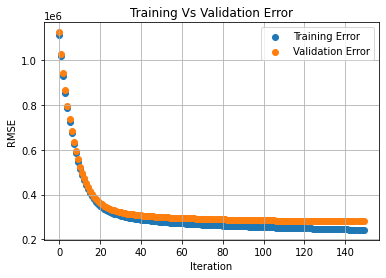

In [15]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

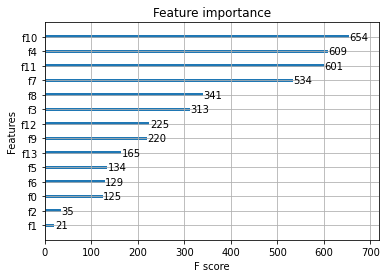

In [16]:
xgb.plot_importance(regressor)
plt.show()

In [17]:
X

,TypeH,TypeT,TypeU,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longitude,Propertycount,cluster_label
0,1.00000,0.00000,0.00000,2.00000,2.50000,1.00000,1.00000,202.00000,156.83459,1966.60915,-37.79960,144.99840,4019.00000,9
1,1.00000,0.00000,0.00000,2.00000,2.50000,1.00000,0.00000,156.00000,79.00000,1900.00000,-37.80790,144.99340,4019.00000,9
2,1.00000,0.00000,0.00000,3.00000,2.50000,2.00000,0.00000,134.00000,150.00000,1900.00000,-37.80930,144.99440,4019.00000,9
3,1.00000,0.00000,0.00000,3.00000,2.50000,2.00000,1.00000,94.00000,156.83459,1966.60915,-37.79690,144.99690,4019.00000,9
4,1.00000,0.00000,0.00000,4.00000,2.50000,1.00000,2.00000,120.00000,142.00000,2014.00000,-37.80720,144.99410,4019.00000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,0.00000,0.00000,1.00000,2.00000,6.80000,1.59168,1.71537,593.48893,156.83459,1966.60915,-37.85991,144.89468,6380.00000,14
27206,0.00000,0.00000,1.00000,2.00000,6.80000,1.59168,1.71537,593.48893,156.83459,1966.60915,-37.85689,144.89079,6380.00000,14
27207,0.00000,0.00000,1.00000,2.00000,6.80000,1.59168,1.71537,593.48893,156.83459,1966.60915,-37.86394,144.90485,6380.00000,14
27208,0.00000,0.00000,1.00000,1.00000,4.60000,1.59168,1.71537,593.48893,156.83459,1966.60915,-37.85682,144.99913,4380.00000,4


In [25]:
X.iloc[0].values

array([1.000000, 0.000000, 0.000000, 2.000000, 2.500000, 1.000000,
       1.000000, 202.000000, 156.834586, 1966.609153, -37.799600,
       144.998400, 4019.000000, 9.000000])